1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">Hierarchical Clustering</a>
6. <a href="#5">Evaluate the model</a>
7. <a href="#6">Insights</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from matplotlib import rcParams
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.manifold import TSNE
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>

We use this data fron kaggle https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download


In [ ]:
#read the data

df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases (
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETR** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

## 2. <a name="2">Data investigation</a>

in this part we will check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>



In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### there is nulll values in columns (credit_limit, Minumum_payments)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## from description of data
### we notice that there is very difference between mean an 50% of almost all features so we notice this data will be skewed at almost af all features

In [ ]:
df.duplicated().sum()

0

In [ ]:
# unique values in each column
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')
    print('-'*30)

CUST_ID: 8950
------------------------------
BALANCE: 8871
------------------------------
BALANCE_FREQUENCY: 43
------------------------------
PURCHASES: 6203
------------------------------
ONEOFF_PURCHASES: 4014
------------------------------
INSTALLMENTS_PURCHASES: 4452
------------------------------
CASH_ADVANCE: 4323
------------------------------
PURCHASES_FREQUENCY: 47
------------------------------
ONEOFF_PURCHASES_FREQUENCY: 47
------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY: 47
------------------------------
CASH_ADVANCE_FREQUENCY: 54
------------------------------
CASH_ADVANCE_TRX: 65
------------------------------
PURCHASES_TRX: 173
------------------------------
CREDIT_LIMIT: 205
------------------------------
PAYMENTS: 8711
------------------------------
MINIMUM_PAYMENTS: 8636
------------------------------
PRC_FULL_PAYMENT: 47
------------------------------
TENURE: 7
------------------------------


In [ ]:
df.drop(columns=[ 'CUST_ID'], inplace=True)

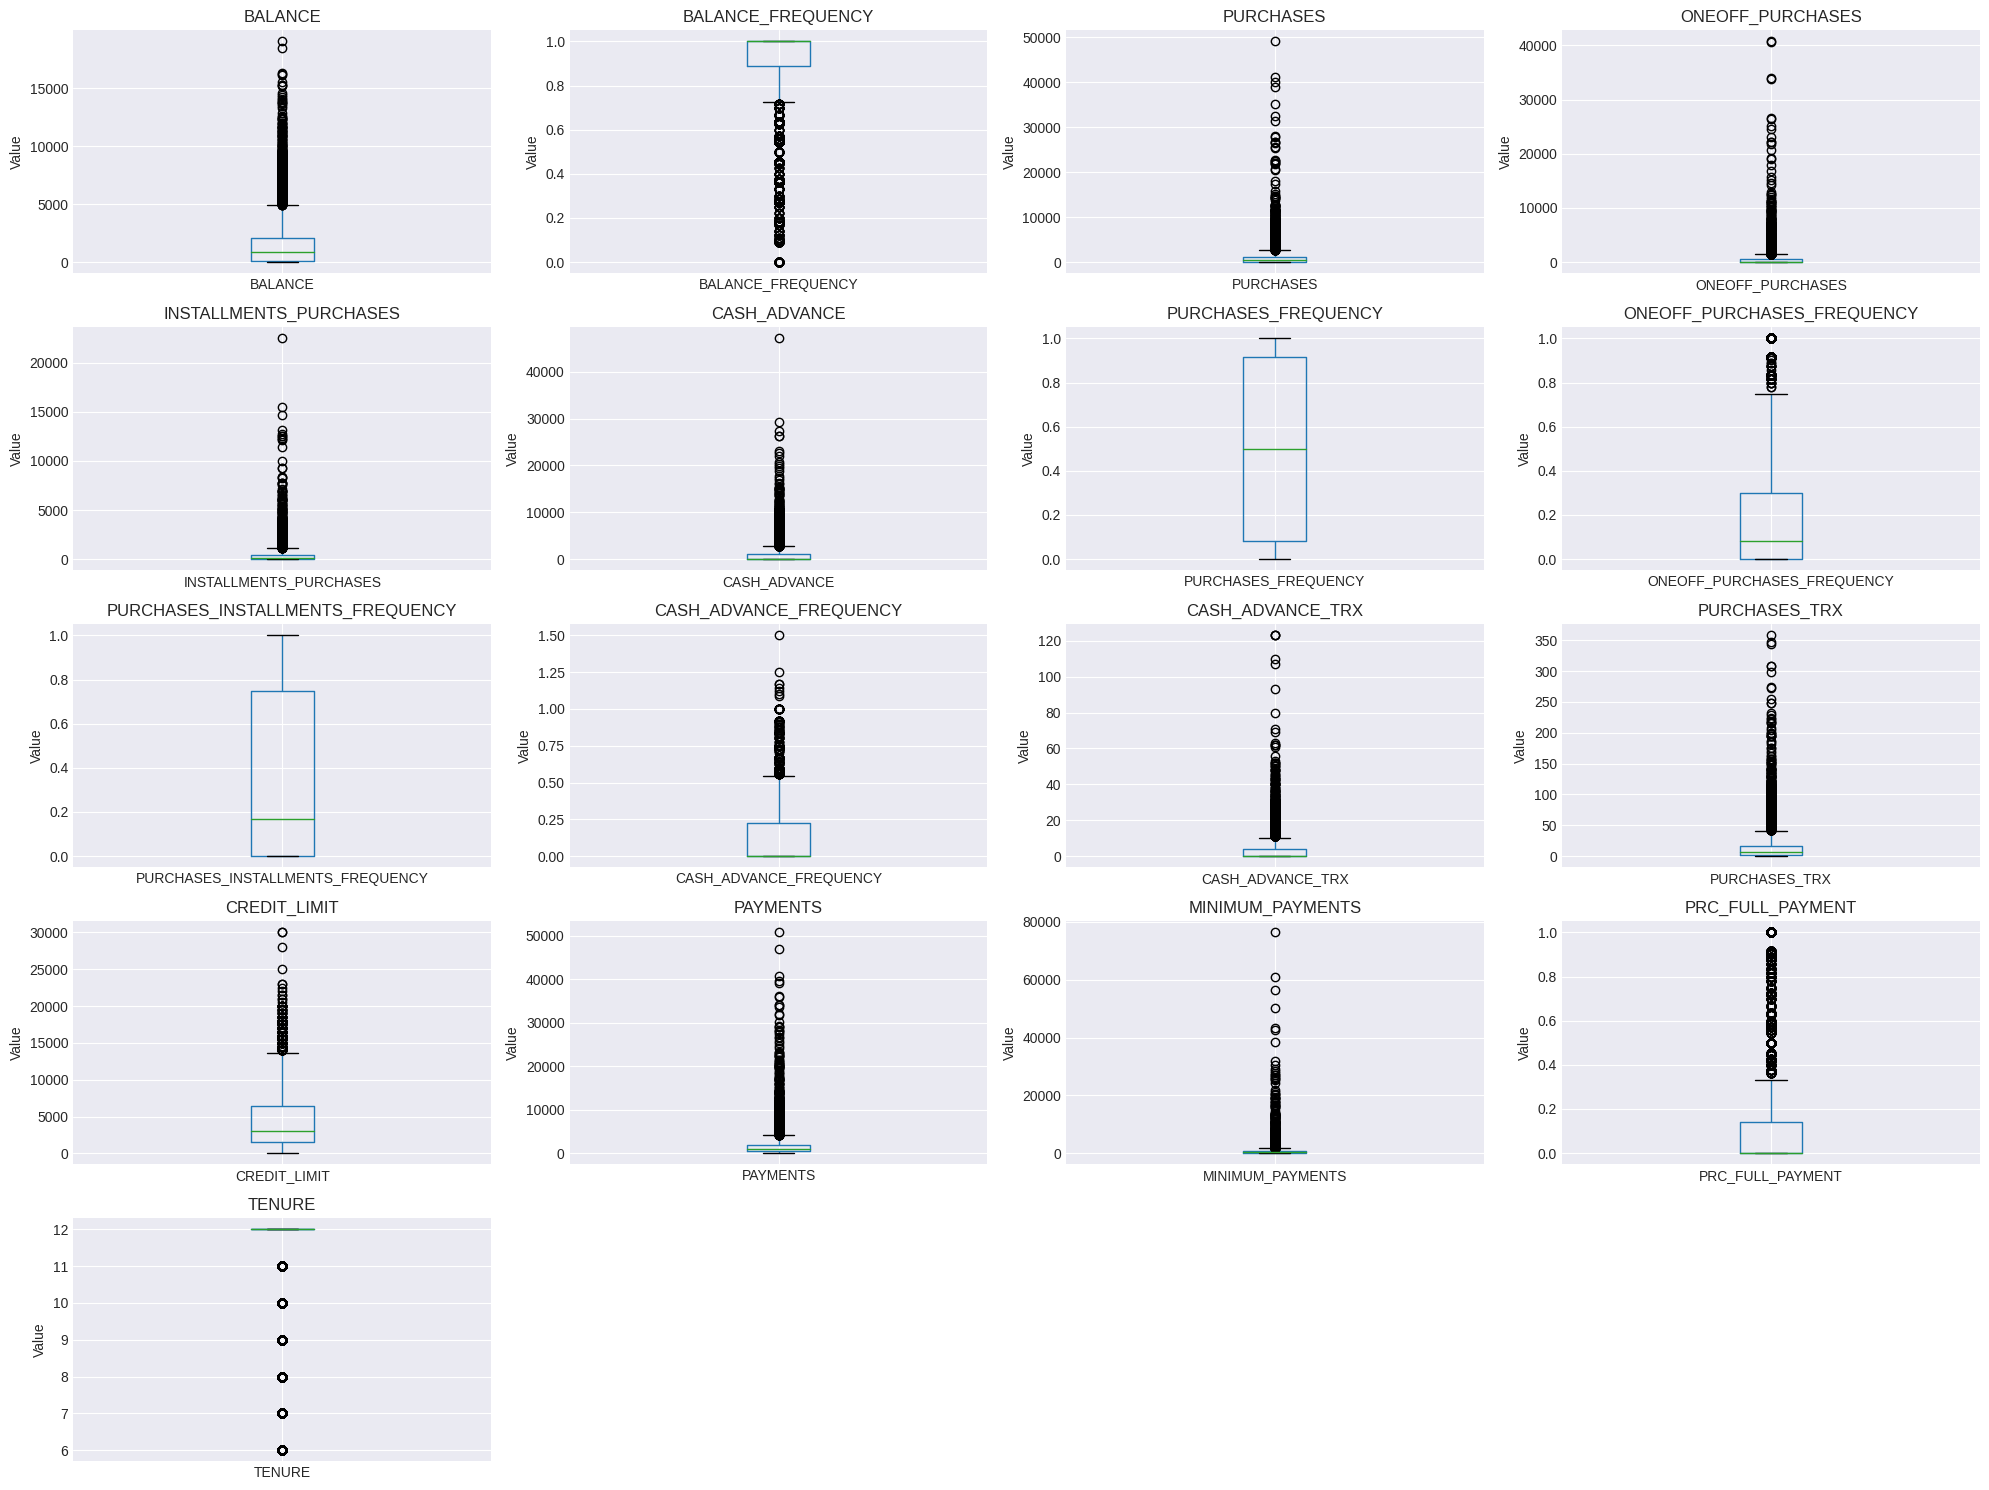

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))

# Loop through each column and plot a box plot
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 4, i)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


### from figures we notice there is ** outliers ** in almost all features expect

##### 1-PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY
##### 2-We notice that ,The majority of columns  positive skewness, with only one column showing approximately normal distribution (purchased frequency), and one column displaying negative skewness (balance frequency).



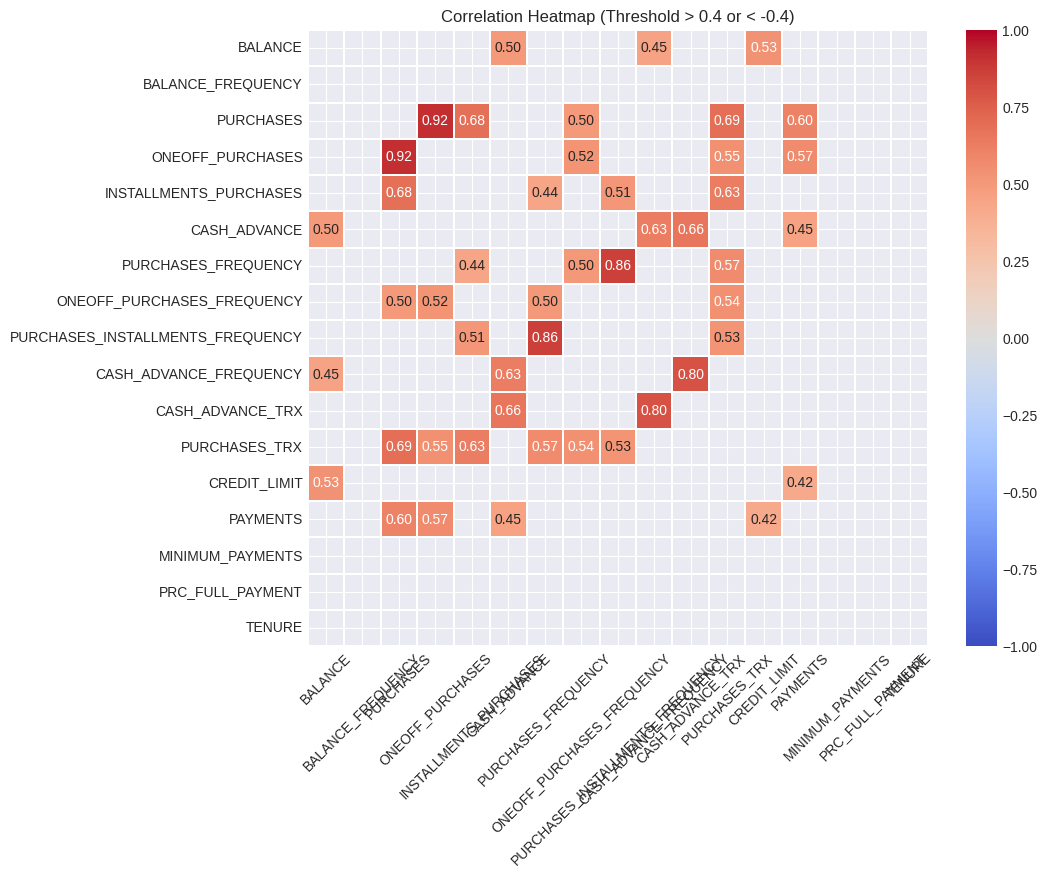

In [ ]:
# Calculate the correlation matrix
correlation = df.corr()

# Define the threshold and filter the correlation matrix
threshold = 0.4
corr_filtered = correlation[(correlation.abs() > threshold) & (correlation != 1)]

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap (Threshold > 0.4 or < -0.4)')
sns.heatmap(corr_filtered, annot=True, fmt='.2f', linewidths=0.3, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### we notice that there is some columns have a high correlations
1- `PURCHASES`, `ONEOFF_PURCHASES`  0.92

2-`PURCHASES_FREQUENCY` ,`PURCHASES_INSTALLMENTS_FREQUENCY` 0.86

3-`PURCHASES_TRX` ,`CASH_ADVANCE_FREQUENCY` 0.80

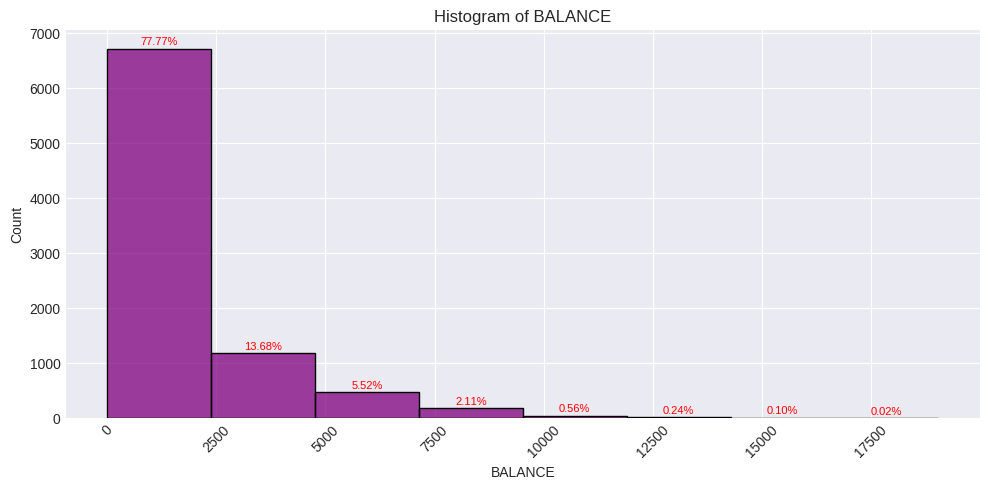

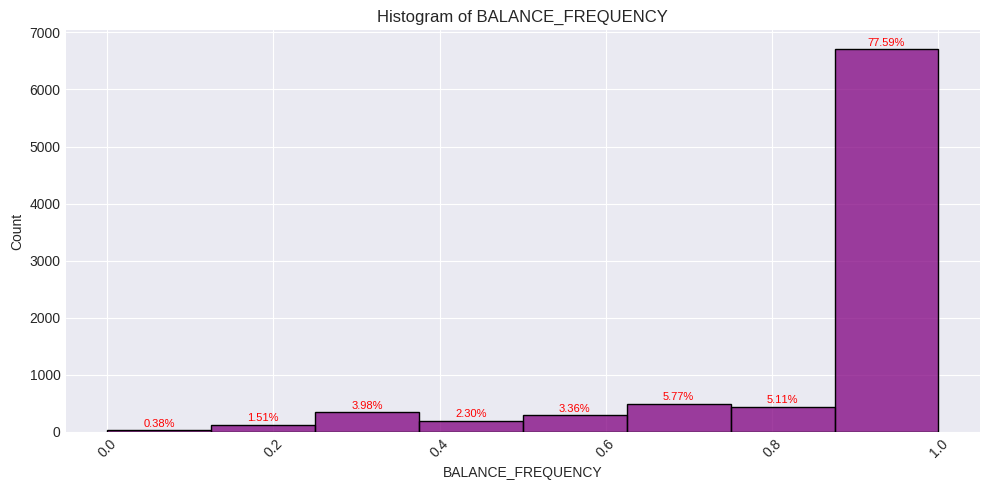

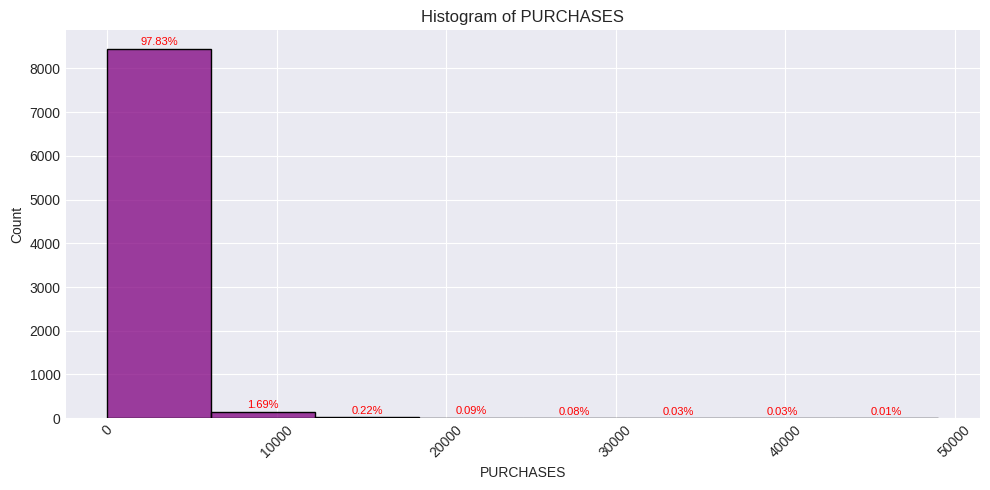

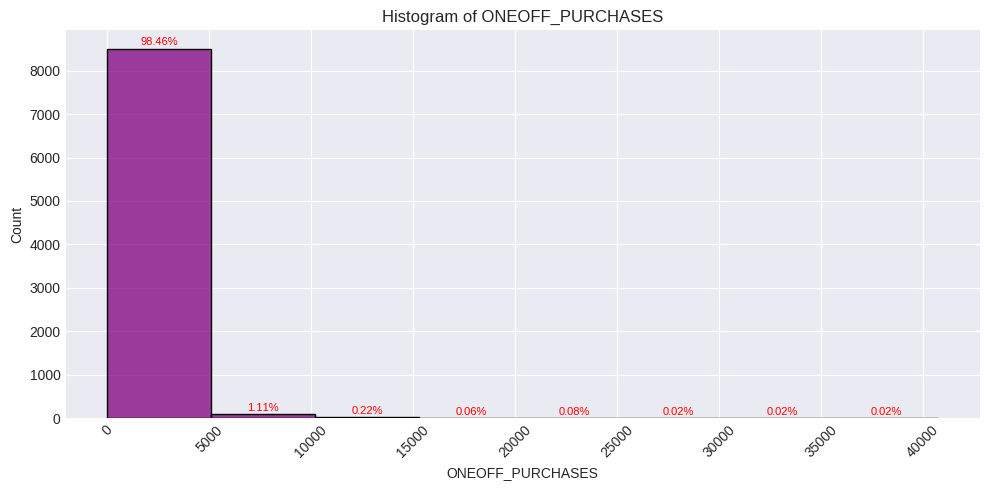

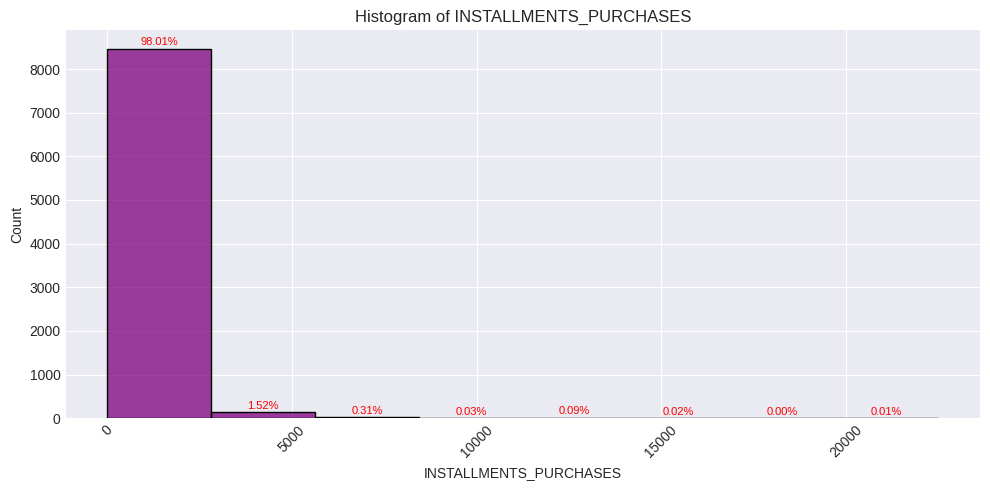

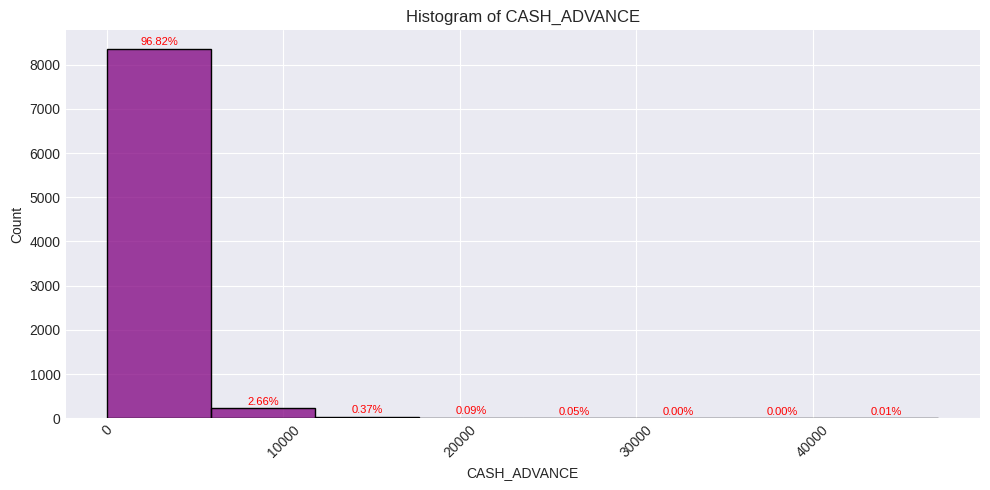

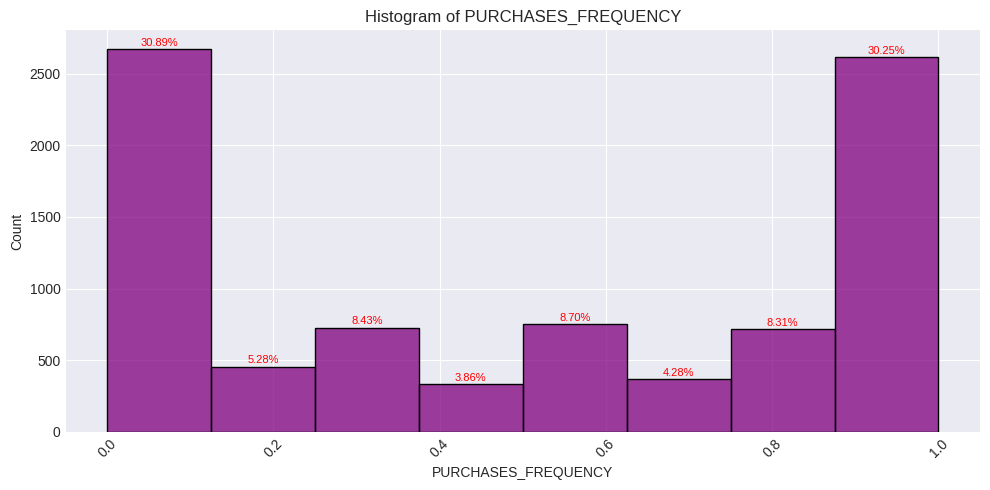

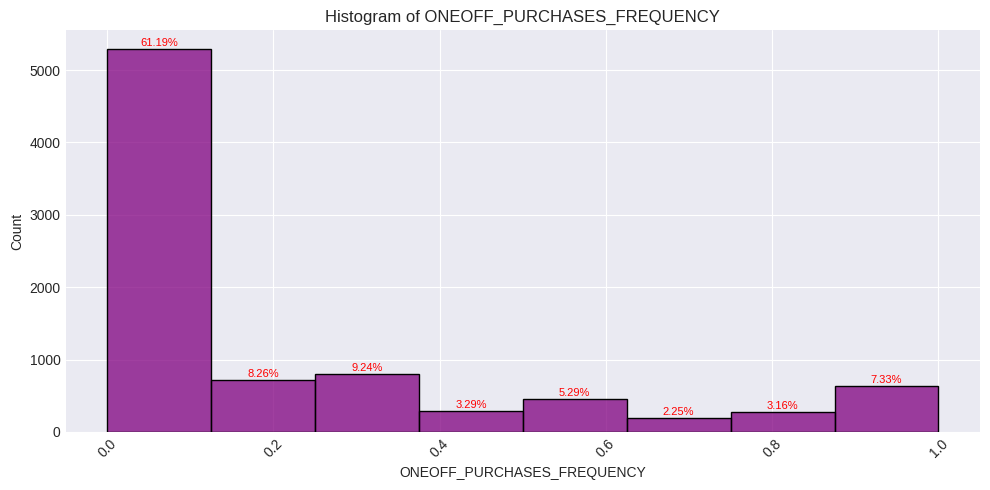

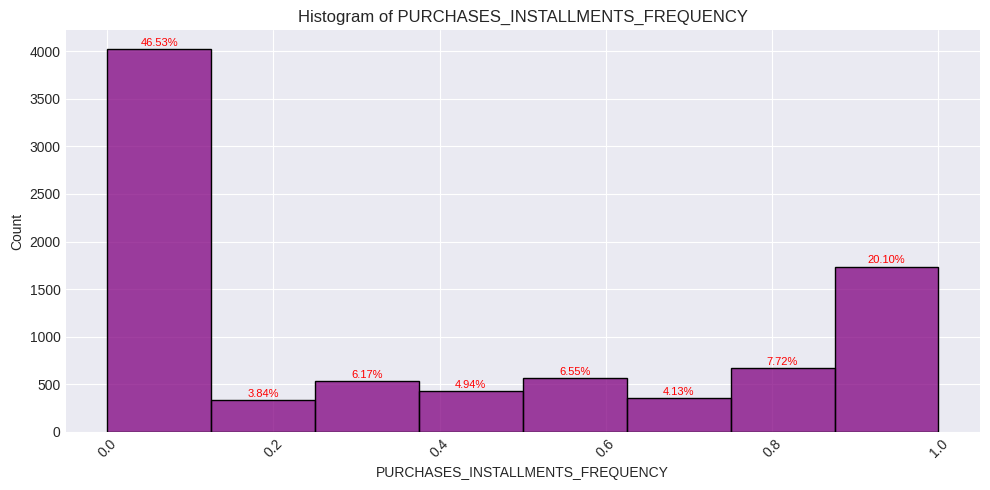

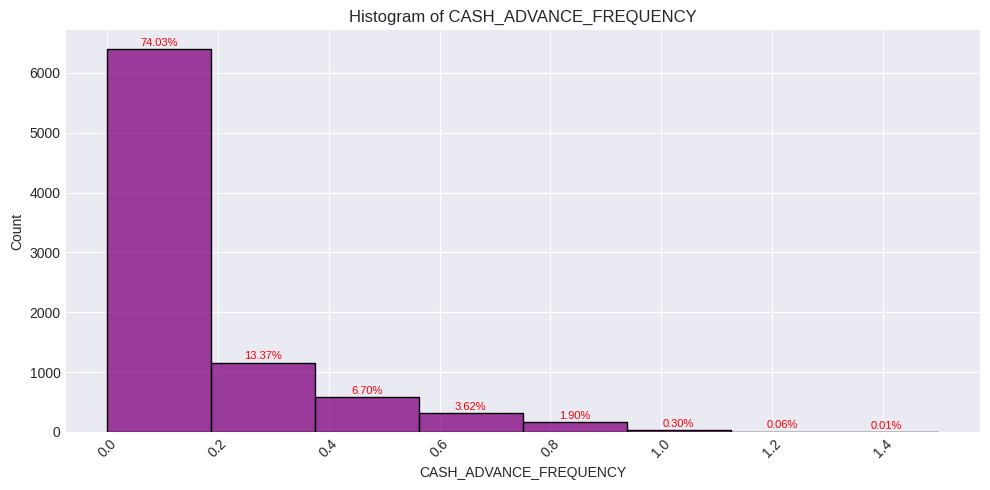

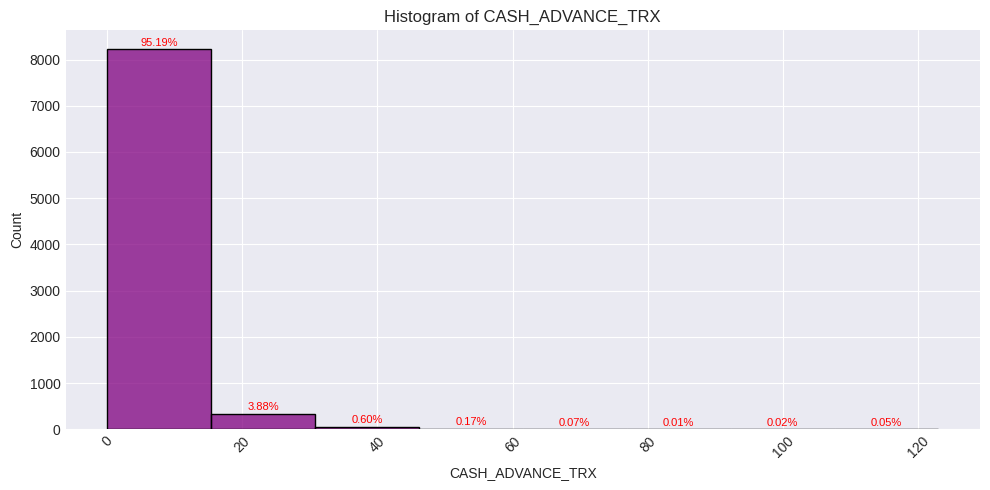

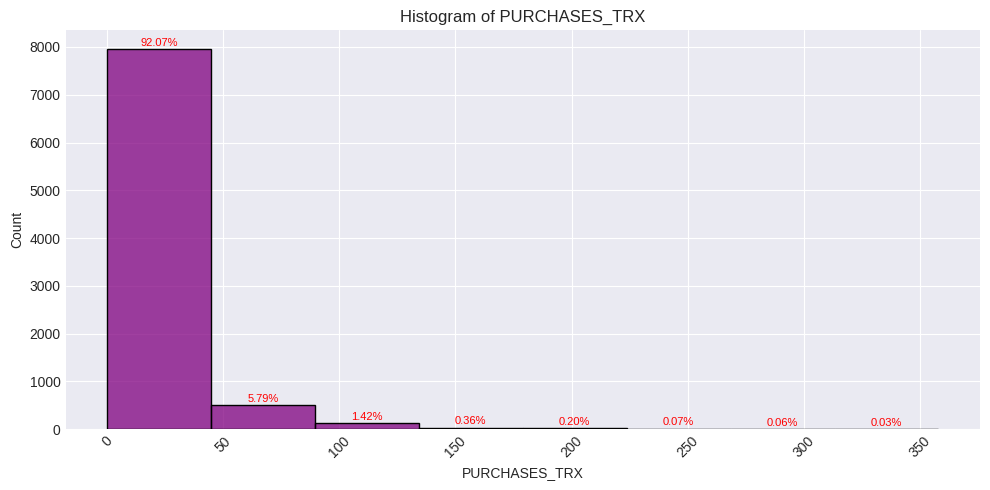

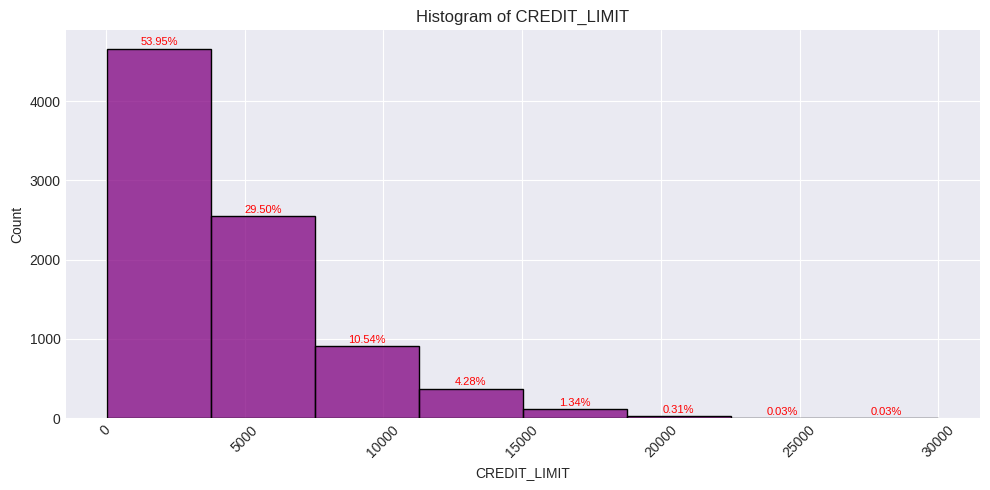

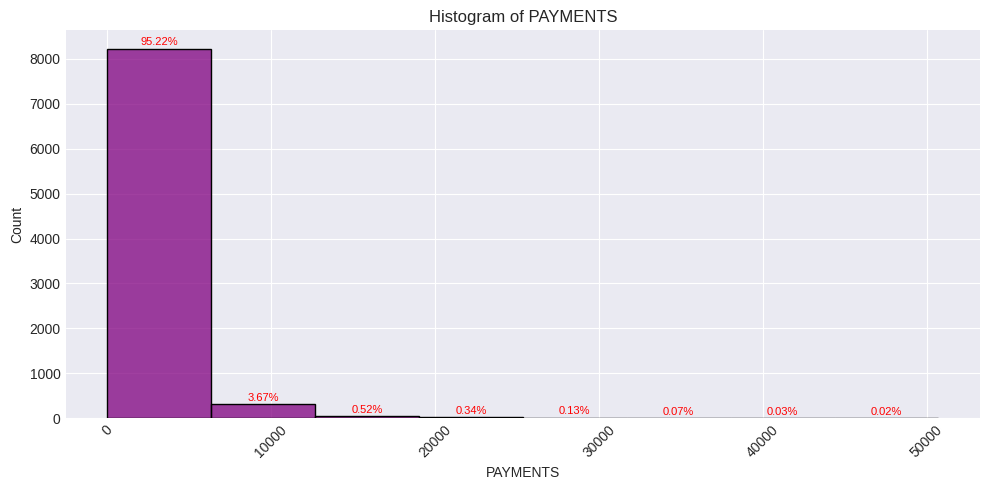

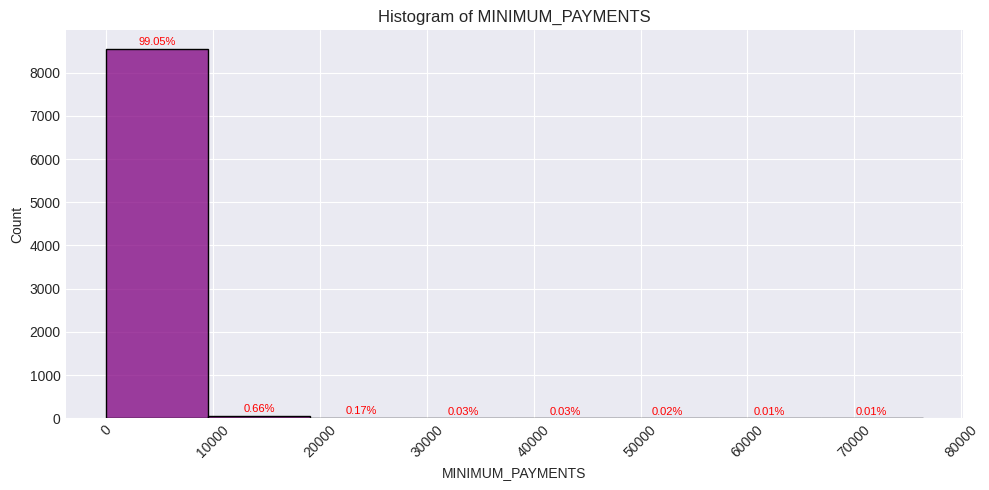

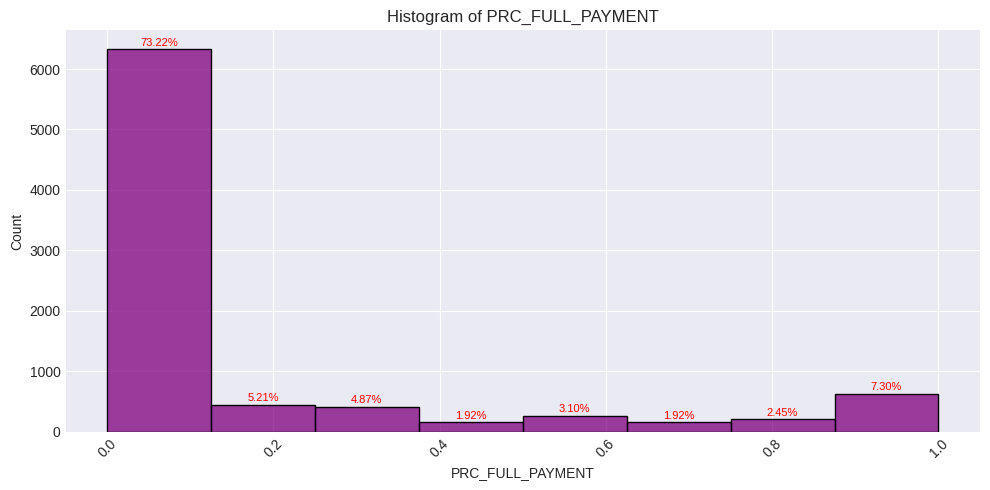

In [ ]:
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
selected_data = df[columns_of_interest].dropna()

# Plot histograms for each selected column individually
for column in columns_of_interest:
    plt.figure(figsize=(10, 5))
    sns.histplot(selected_data[column], bins=8, color='purple', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')

    # Calculate the percentage of data points in each bin
    counts, bins = np.histogram(selected_data[column], bins=8)
    percentages = (counts / len(selected_data[column])) * 100

    # Annotate each bin with the percentage value
    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%',
                     xy=(bin_edge + np.diff(bins)[0] / 2, count),
                     xytext=(0, 1),
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     color='red')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Insights from the prevoius plots of data
#### 1- Account balance
 **77.77%** of customers mantain account balance not exceeding 2300$ so most of customer prefer spending money.



#### 2- Balance Freguency
 **77.58%** Most of customers updated their account balance so they always use it and activate their credit card frequently



#### 3- Purchers
 **97.83%** most of customers  make pruchers  



#### 4-**Most customers 98\%**   prefer purchases made in installments, with the majority opting for purchases under $5000, indicating a preference for budget-friendly spending and manageable repayment plans.



#### 5-Purchase Frequency
 **30.8%** of customers make pruchers frequently,**30** not make purchers frequently and the other between them vary from customer to another.



#### 6- ONEOFF_PURCHASES_FREQUENCY
 **61.19%** not prefer make purcheres in on_go



#### 7- PURCHASES_INSTALLMENTS_FREQUENCY
 **46.5%** not prefer purchers installments but about **27.5** prefer purchers installments



#### 8- CASH_ADVANCE_FREQUENCY
 **85% and more** not prefer cash-frequency so they avoid this method of payment



#### 9- CASH_ADVANCE_TRX ,PURCHASES_TRX
 **92.07** made a number of purchers so they prefer make most frequences



#### 10- CREDIT_LIMIT
 **more than 54.9%** have a limit in credit cards not excedding 4000$ so it is good to be intermediate credit card limit



#### 11- payment_Behaviour: The total amount of money paid towards the credit card balance.
 **95.22** of customers save their credit card active because they pay for it



#### 12- MINIMUM_PAYMENTS :The minimum amount required to be paid each billing cycle to avoid late fees.
 **99%** of customers avoid late fees



#### 13- PRC_FULL_PAYMENT :The percentage of times a customer pays the full balance due each month
 **more that 73.2%** of customers not prefer pay full balance due each month






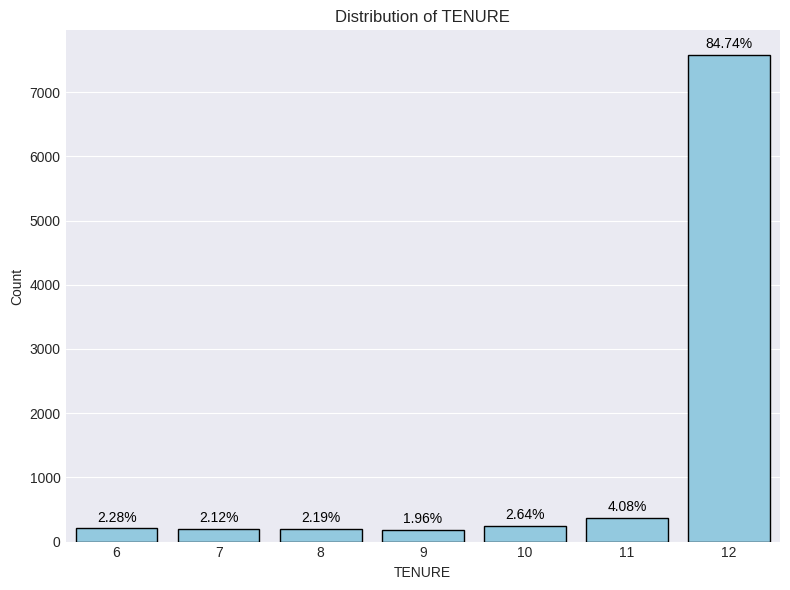

In [ ]:
# Plot the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='TENURE', color='skyblue', edgecolor='black')

# Calculate total count for percentage calculation
total = len(df['TENURE'])

# Annotate each bar with the percentage
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}',  # Display as a percentage with two decimal places
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # Adjust text position
                textcoords='offset points',
                ha='center',
                fontsize=10,
                color='black')

plt.title('Distribution of TENURE')
plt.xlabel('TENURE')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 84.7 % of customers has a service 12 monthes of credit card

## 3. <a name="3">Data preprocessing</a>


### Define below all the issues that you had found in the previous part
1-     outliers      <br>
2-          skewed <br>
3-          null values <br>


In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

#1st  Null values


In [ ]:
#solution
df_copy = df_copy.dropna()

In [ ]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

,0
BALANCE,0.0
BALANCE_FREQUENCY,0.0
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0
CASH_ADVANCE_FREQUENCY,0.0


In [ ]:
df_copy.drop(columns=[ 'PURCHASES_INSTALLMENTS_FREQUENCY','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

Text(0.5, 1.0, 'T-SNE before log Scaling')

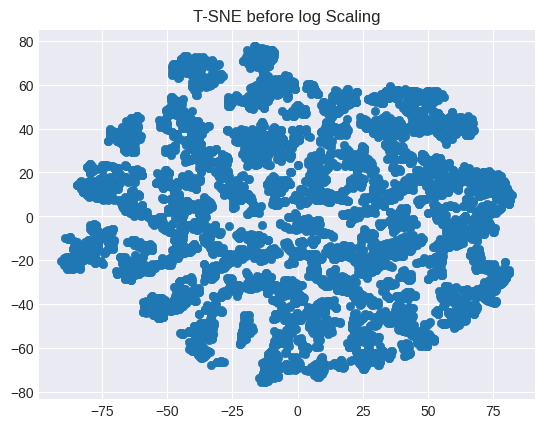

In [ ]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(df_copy)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('T-SNE before log Scaling')

In [ ]:
df_copy.skew()

,0
BALANCE,2.374254
BALANCE_FREQUENCY,-2.084161
PURCHASES,8.055789
INSTALLMENTS_PURCHASES,7.216133
CASH_ADVANCE,5.139629
PURCHASES_FREQUENCY,0.033041
ONEOFF_PURCHASES_FREQUENCY,1.504234
CASH_ADVANCE_TRX,5.673327
PURCHASES_TRX,4.578418
CREDIT_LIMIT,1.507019


In [ ]:
df_copy_log = np.log(df_copy + 0.1)
df_copy_log.skew()

,0
BALANCE,-0.904675
BALANCE_FREQUENCY,-2.850055
PURCHASES,-0.980708
INSTALLMENTS_PURCHASES,-0.140807
CASH_ADVANCE,0.170686
PURCHASES_FREQUENCY,-0.480065
ONEOFF_PURCHASES_FREQUENCY,0.716316
CASH_ADVANCE_TRX,0.393508
PURCHASES_TRX,-0.599293
CREDIT_LIMIT,-0.107283


Text(0.5, 1.0, 'T-SNE after log Scaling')

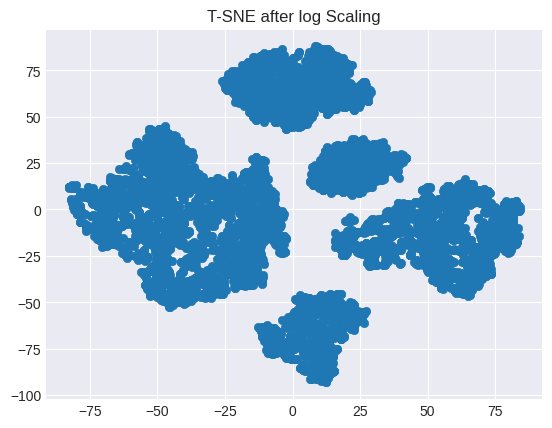

In [ ]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(df_copy_log)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('T-SNE after log Scaling')

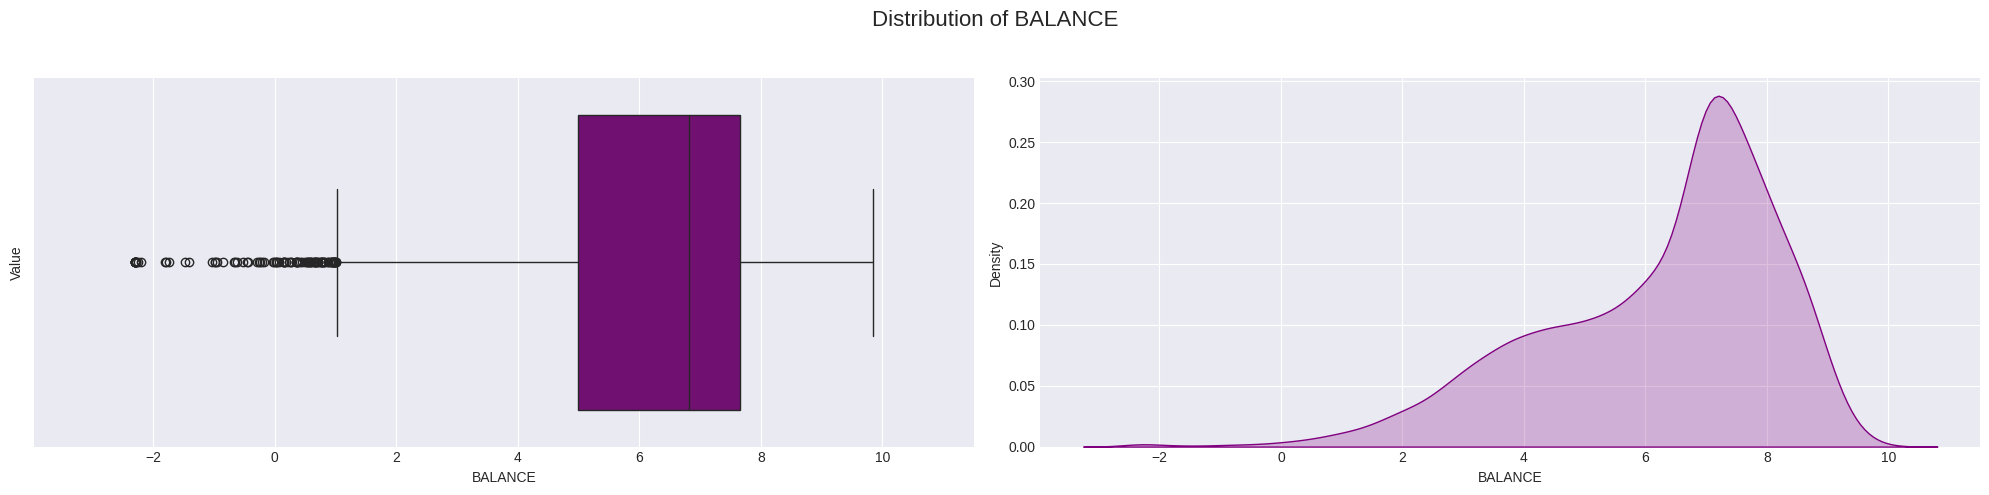

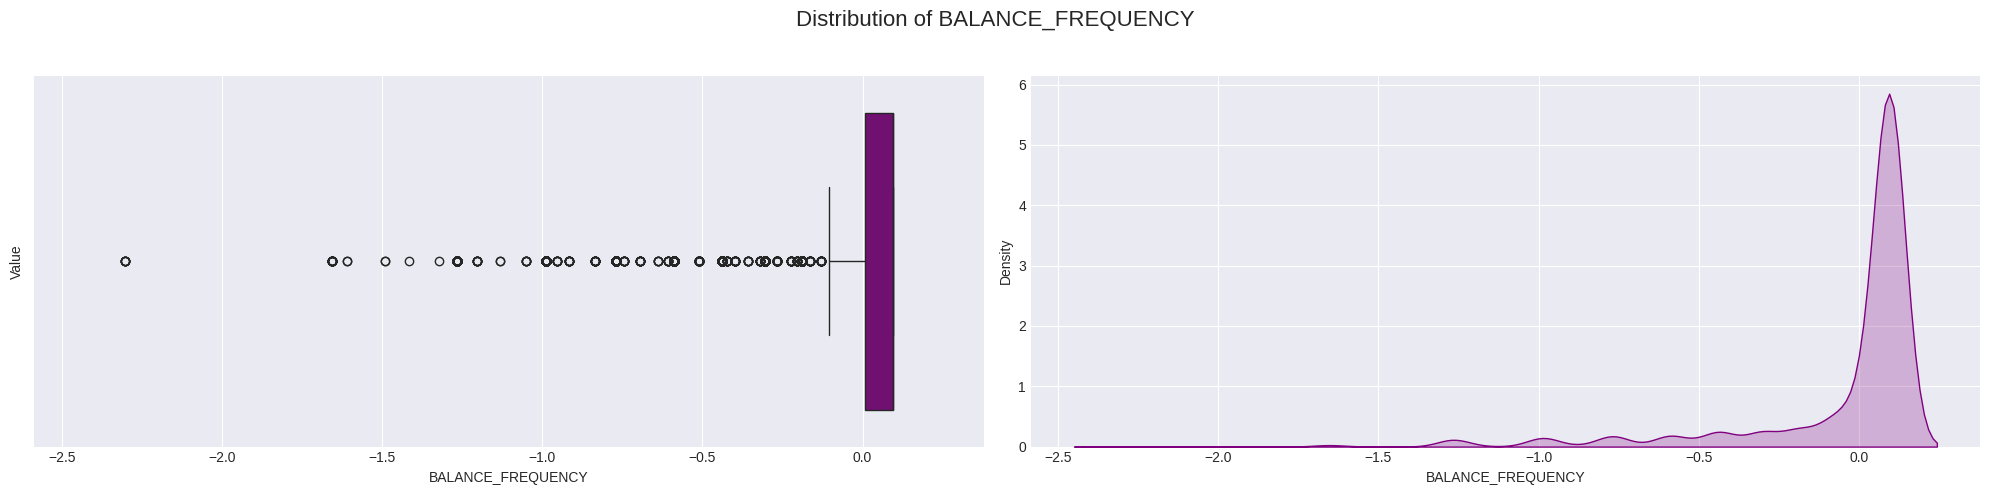

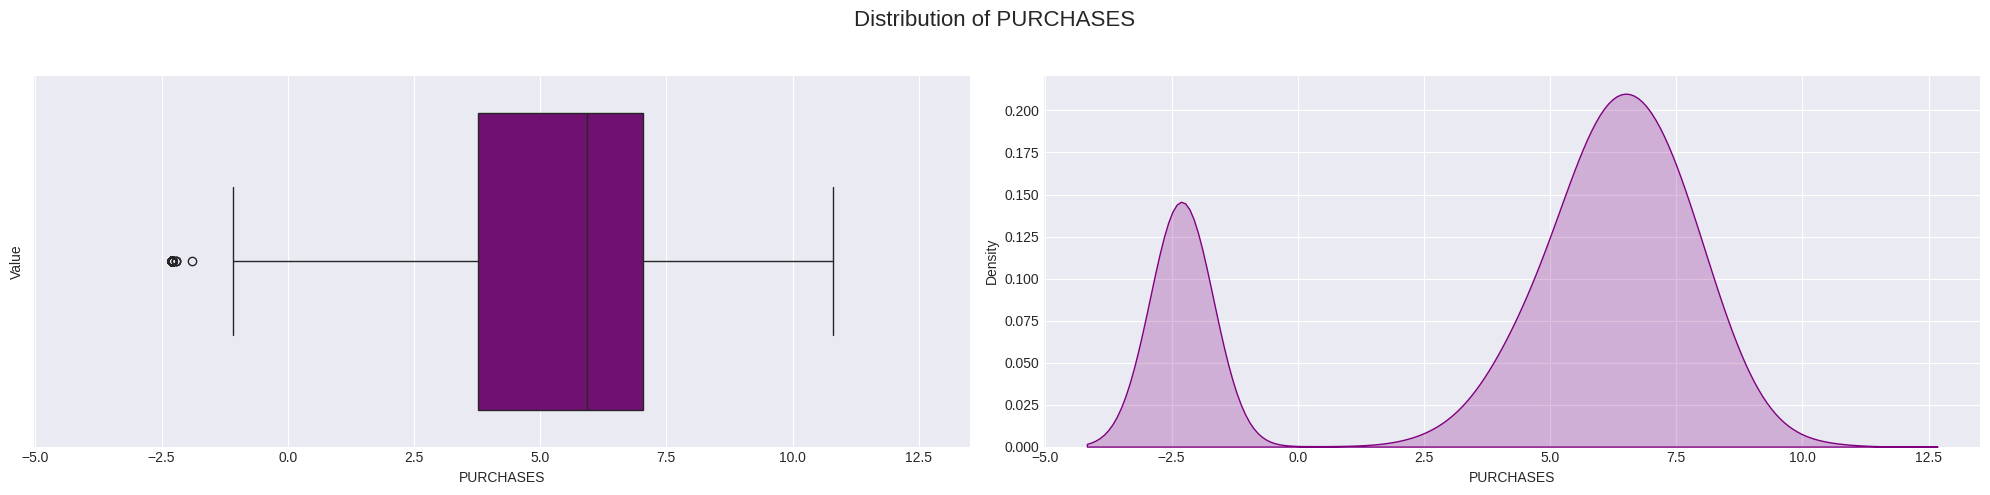

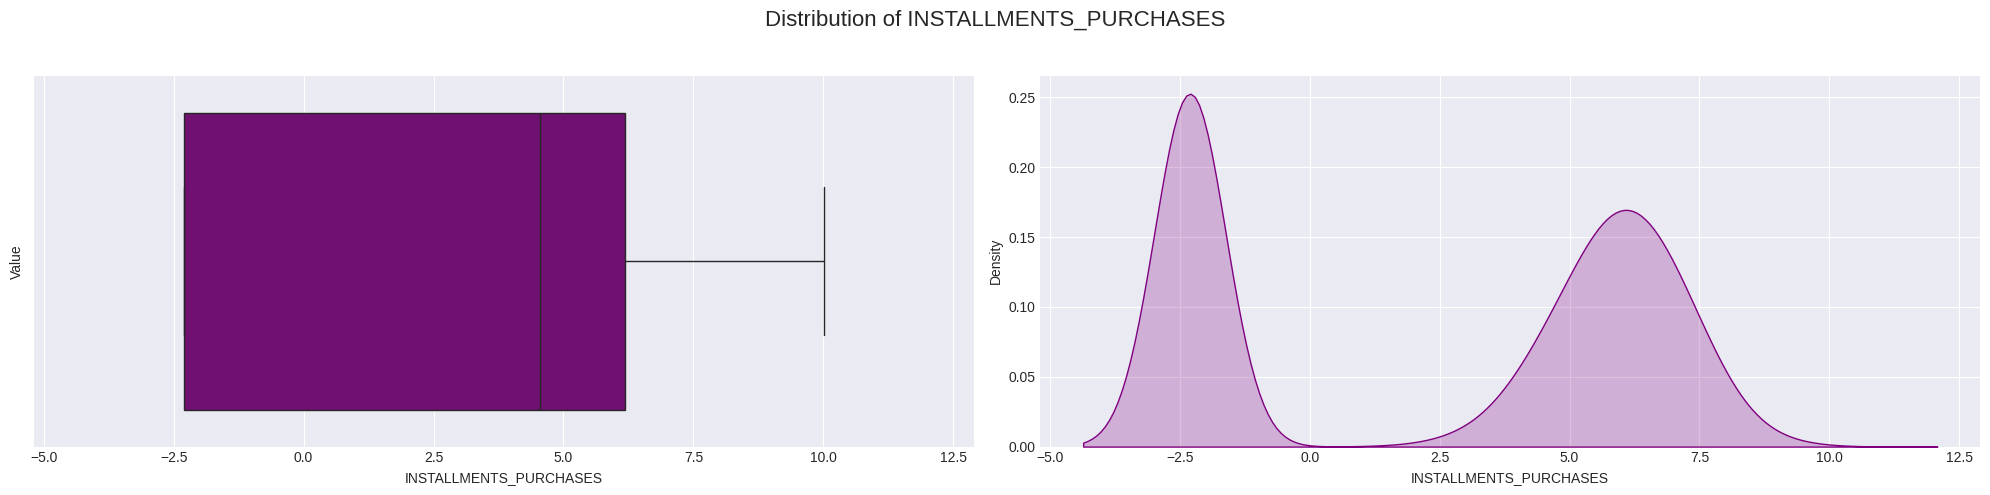

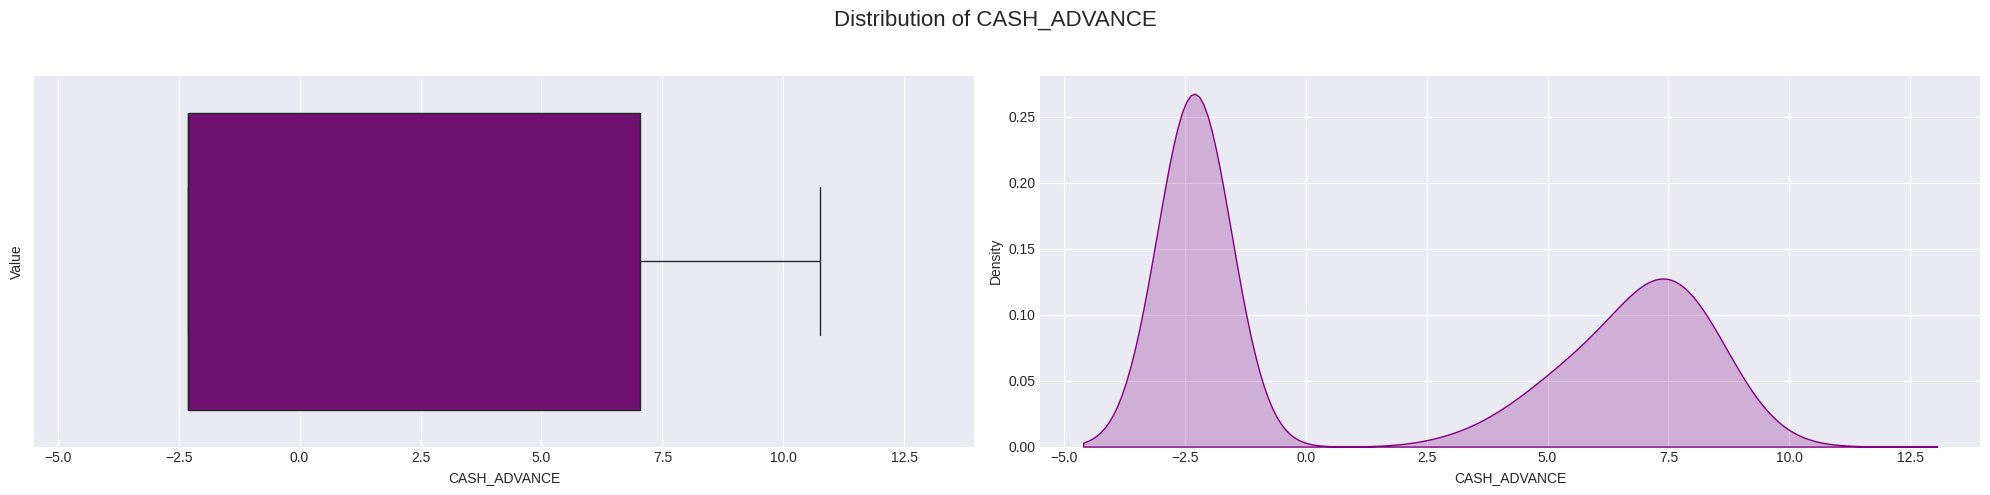

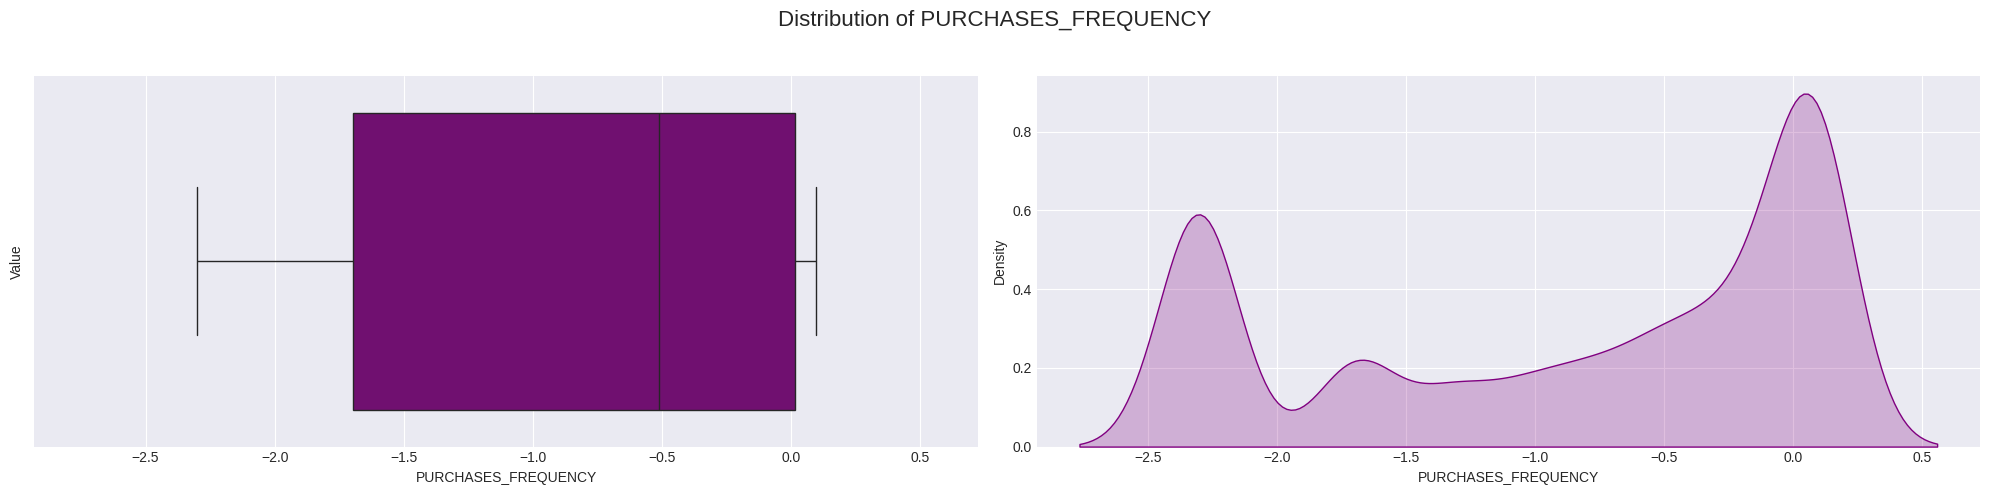

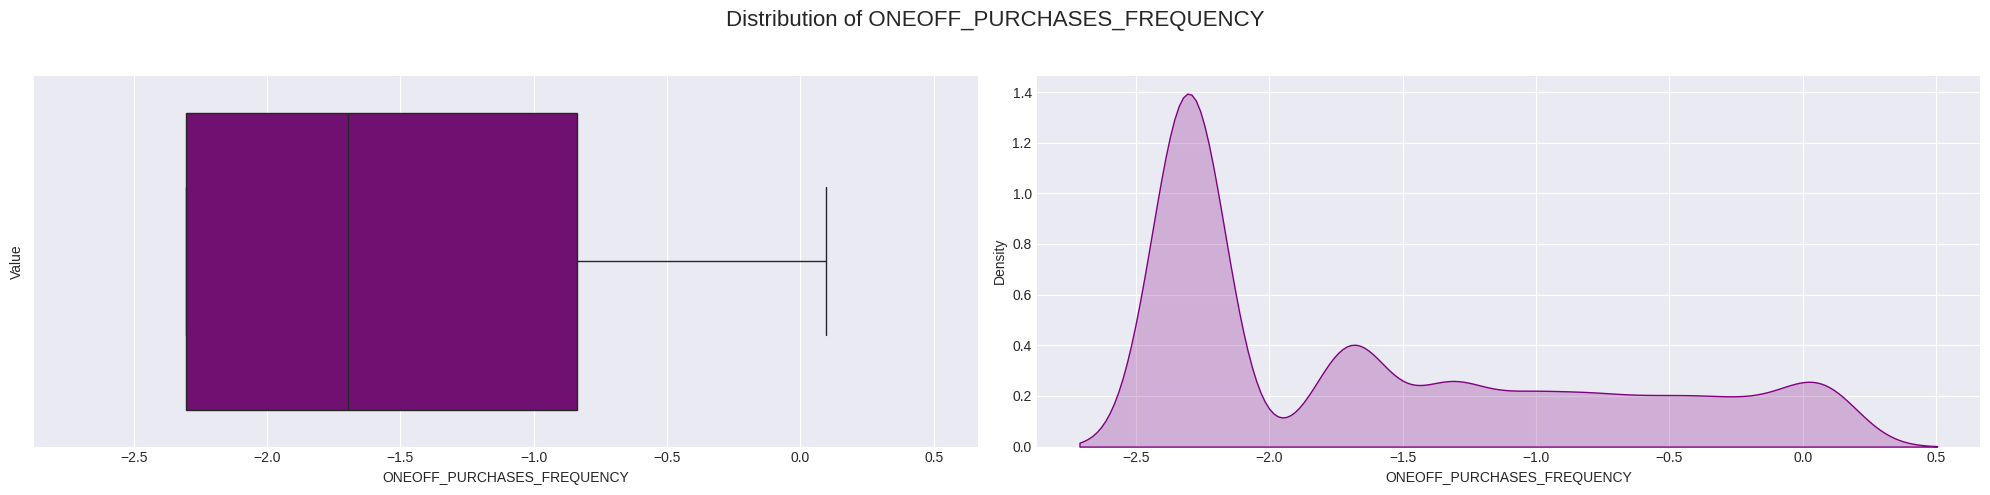

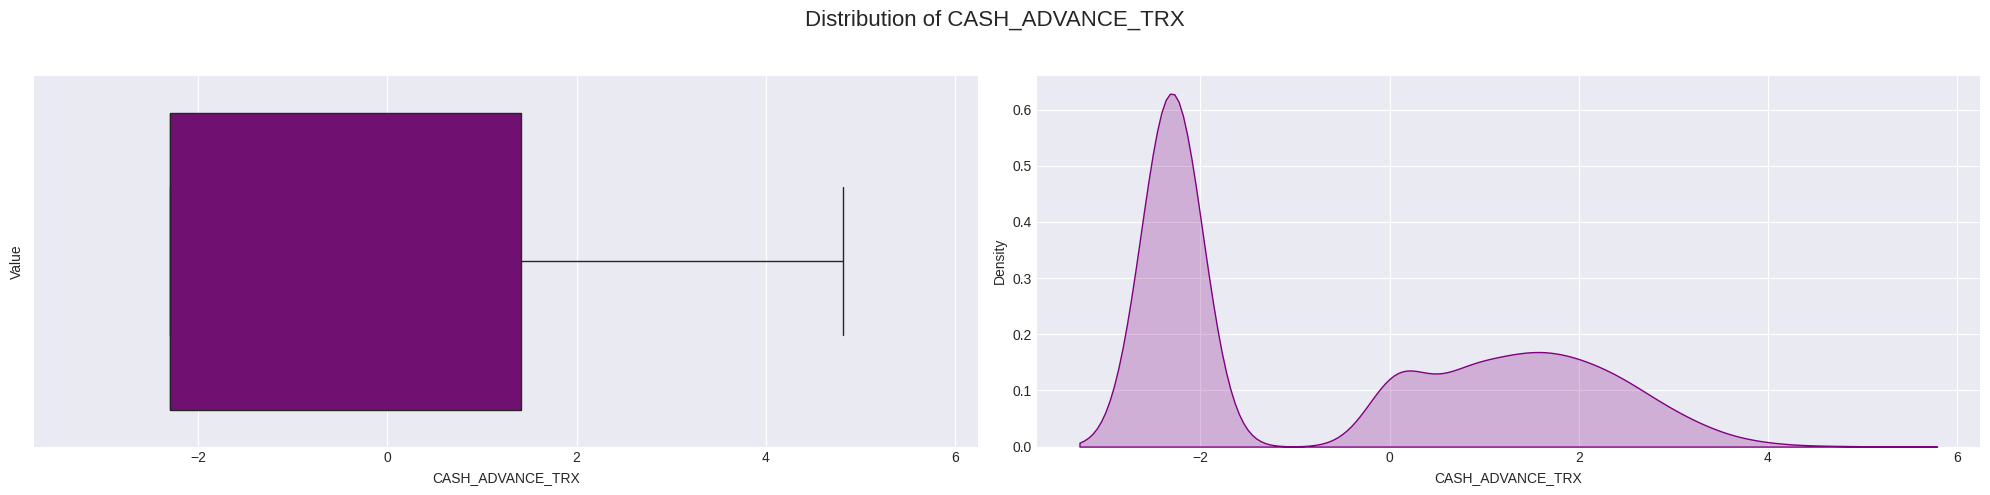

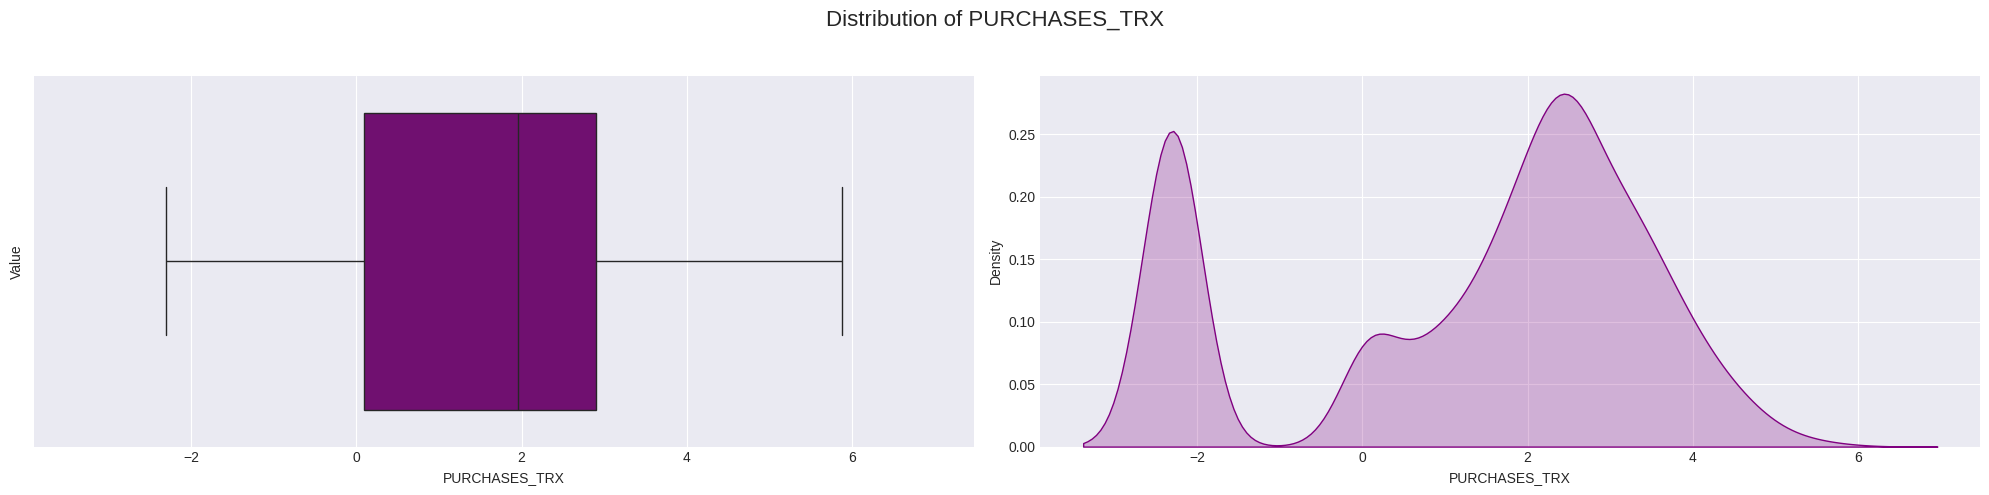

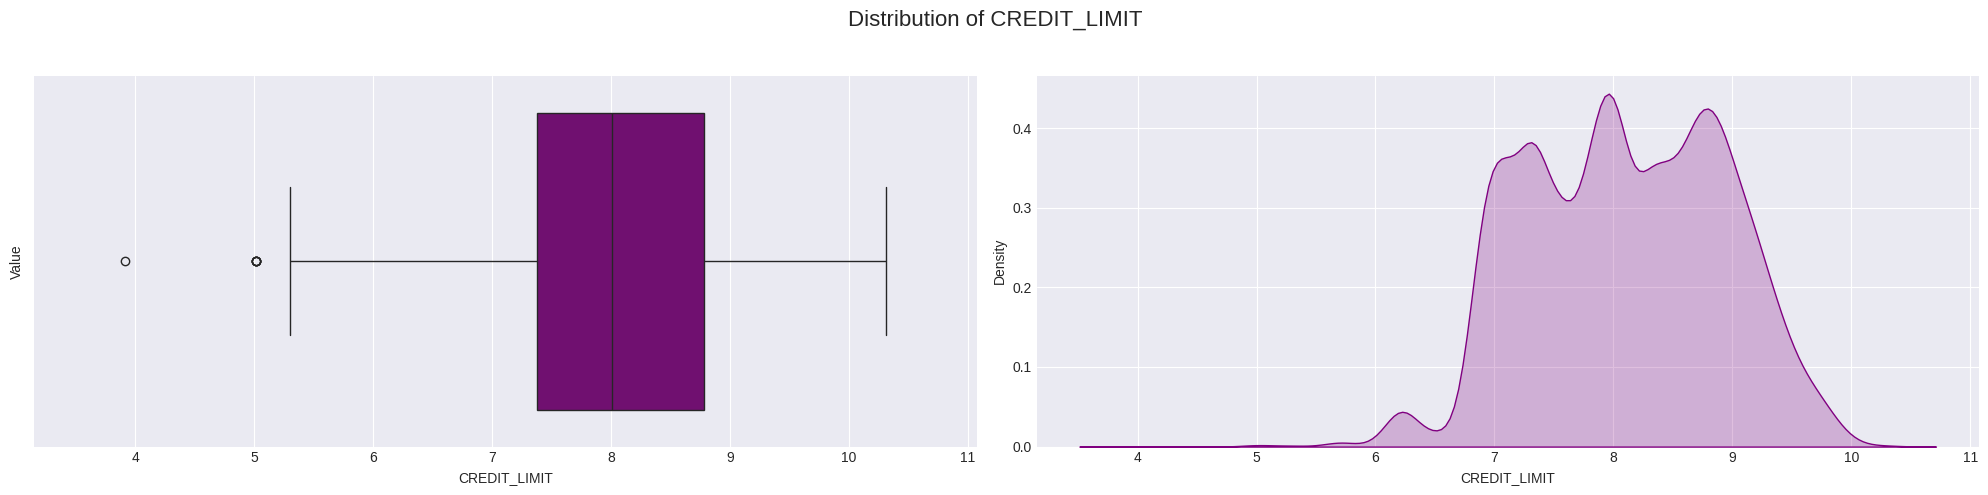

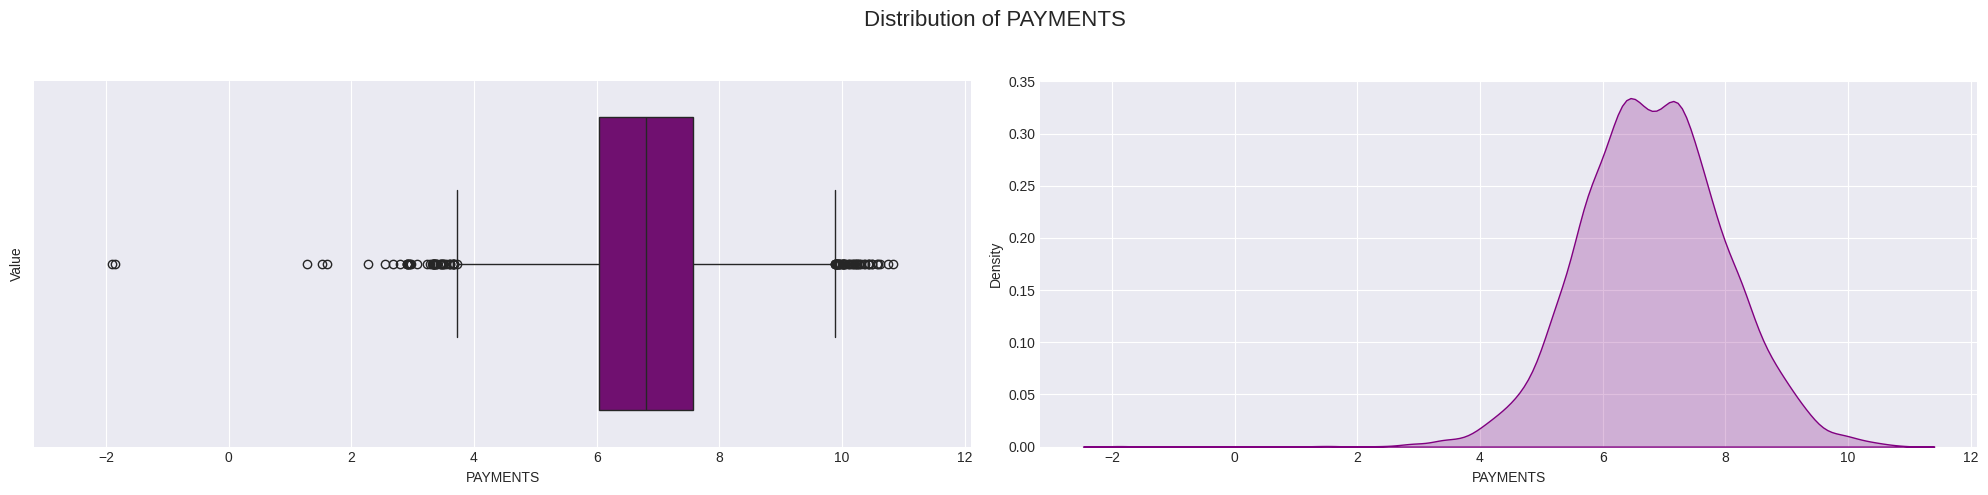

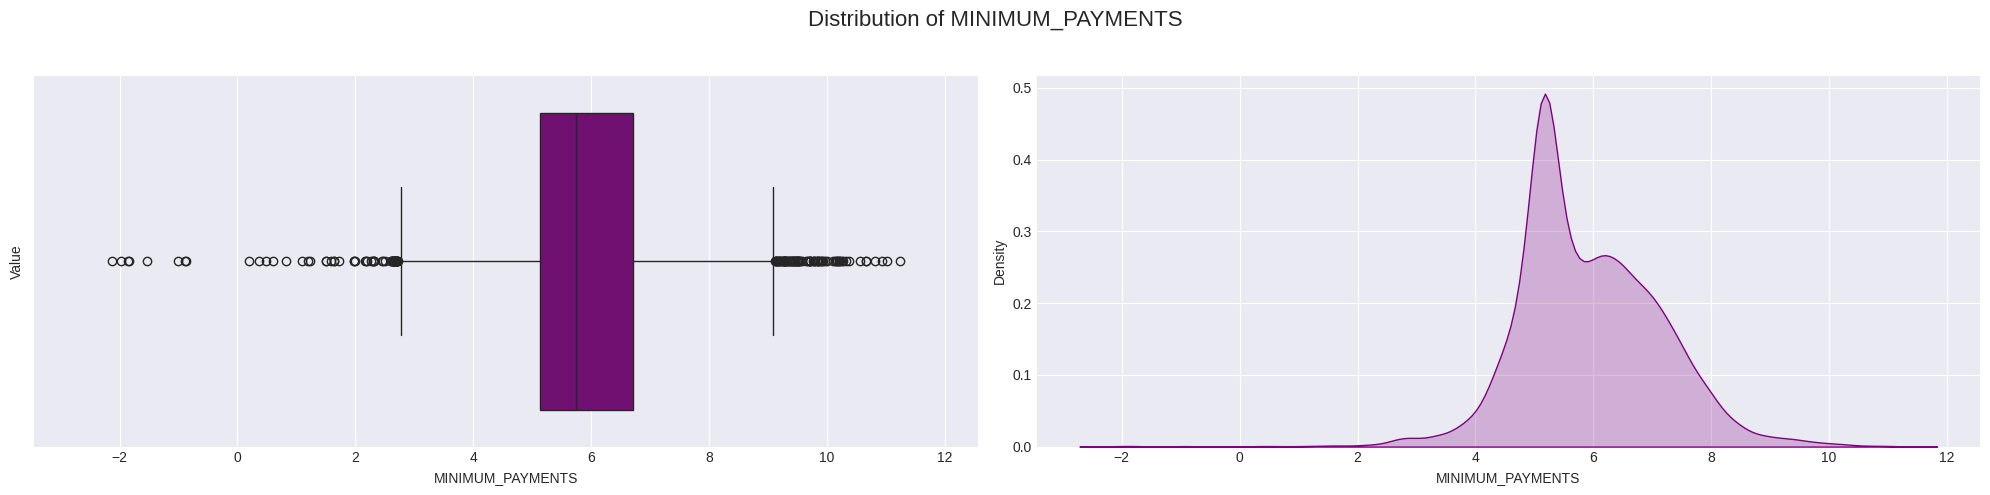

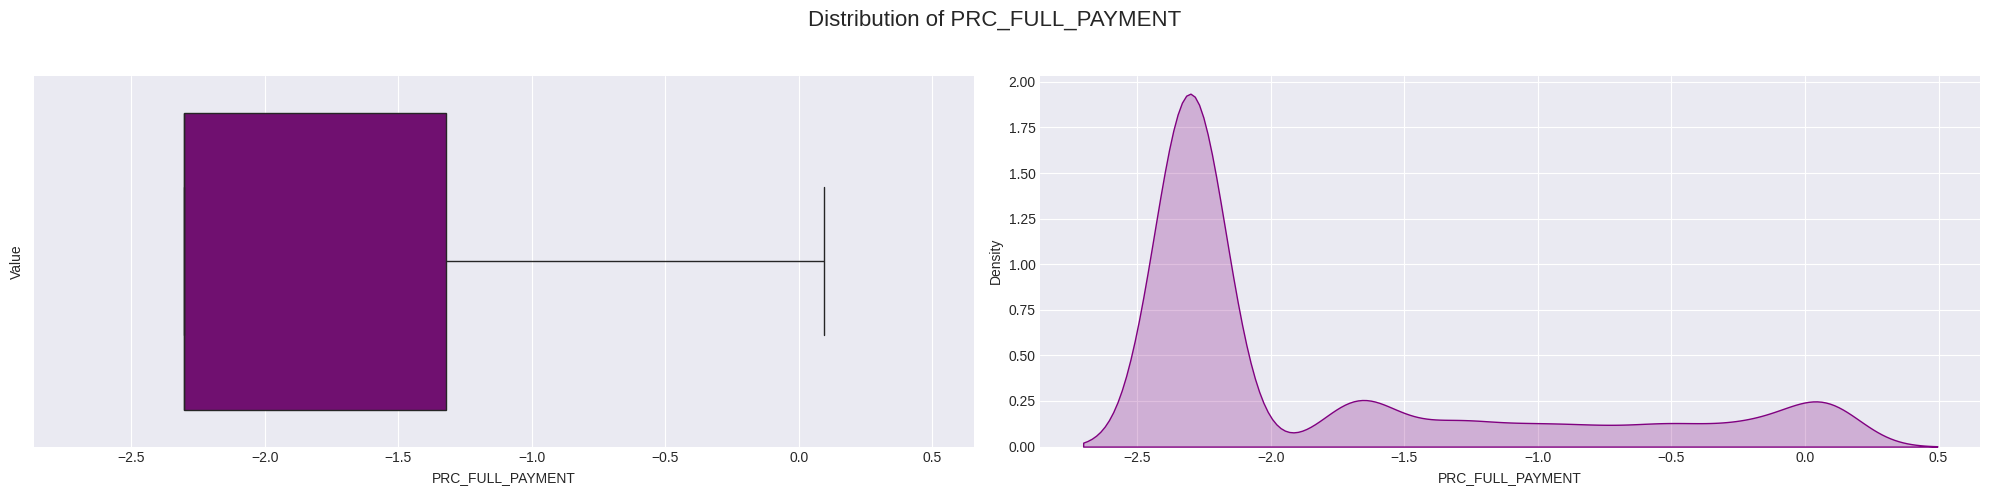

In [ ]:
for col in df_copy_log.columns:
    if df_copy_log[col].nunique() > 10:
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, figsize=(20, 5), sharex=True)
        fig.suptitle(f'Distribution of {col}', fontsize=16)
        sns.boxplot(x=df_copy_log[col], ax=ax_box, linewidth=1.0, color='purple')
        ax_box.set(xlabel=col, ylabel='Value')
        sns.kdeplot(df_copy_log[col], ax=ax_kde, fill=True, color='purple')
        ax_kde.set(xlabel=col, ylabel='Density')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

#### Data become less sekwed

# herirical clusting


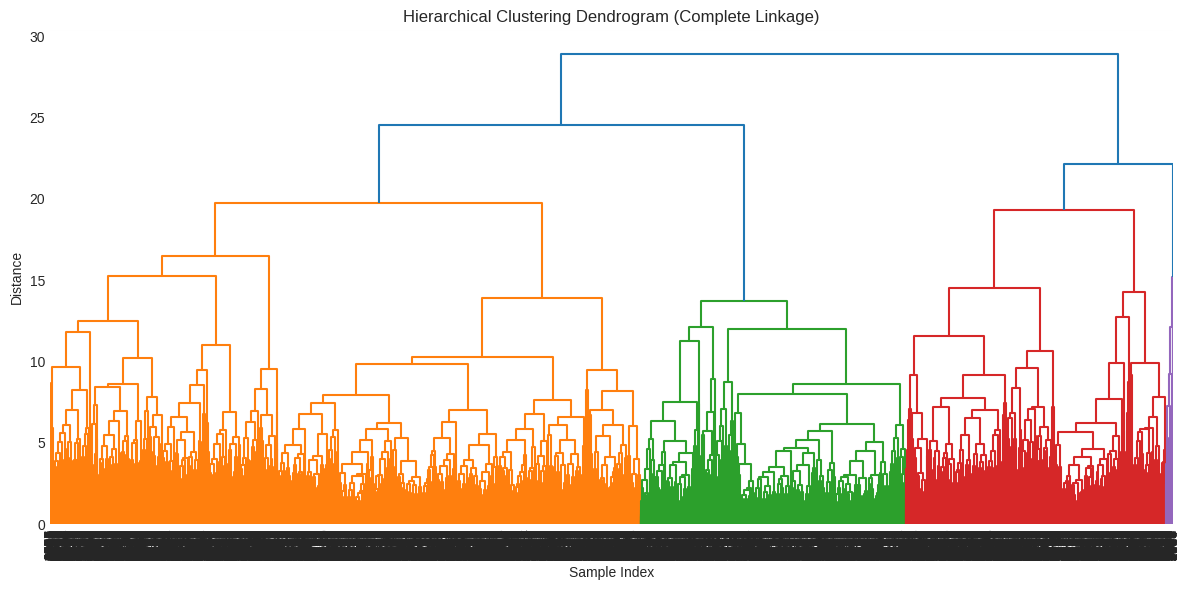

In [ ]:
Z = linkage(df_copy_log, method='complete')
plt.figure(figsize=(12, 6))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=10
          )
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()



In [ ]:
# Initialize AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=5)

# Fit the model on the scaled log-transformed data
hier_model.fit(df_copy_log)

AgglomerativeClustering(n_clusters=5)

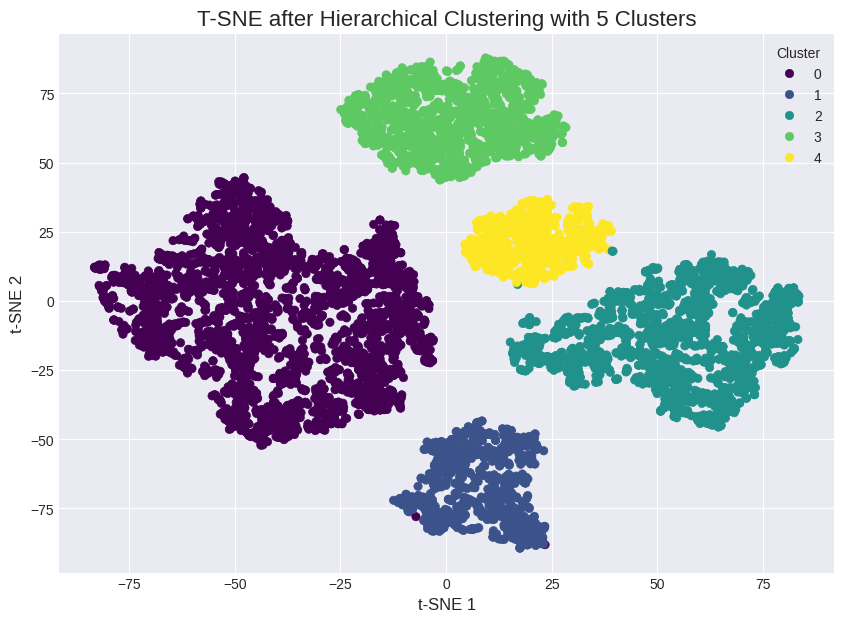

In [ ]:
# Retrieve the cluster labels
df_copy_log['Cluster'] = hier_model.labels_

# Step 2: Apply t-SNE for dimensionality reduction
t_sne = TSNE(init='pca', random_state=42)  # Ensure reproducibility
results = t_sne.fit_transform(df_copy_log.drop(columns='Cluster'))  # Drop 'Cluster' column for t-SNE

# Get the t-SNE components
t_sne_1 = results[:, 0]
t_sne_2 = results[:, 1]

# Step 3: Plot the t-SNE results, coloring by cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=t_sne_1, y=t_sne_2, hue=df_copy_log['Cluster'], palette='viridis', edgecolor=None)

# Set plot title and labels
plt.title('T-SNE after Hierarchical Clustering with 5 Clusters', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Get the labels assigned by the Agglomerative Clustering model
labels = hier_model.labels_

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_copy_log, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5381162861831118


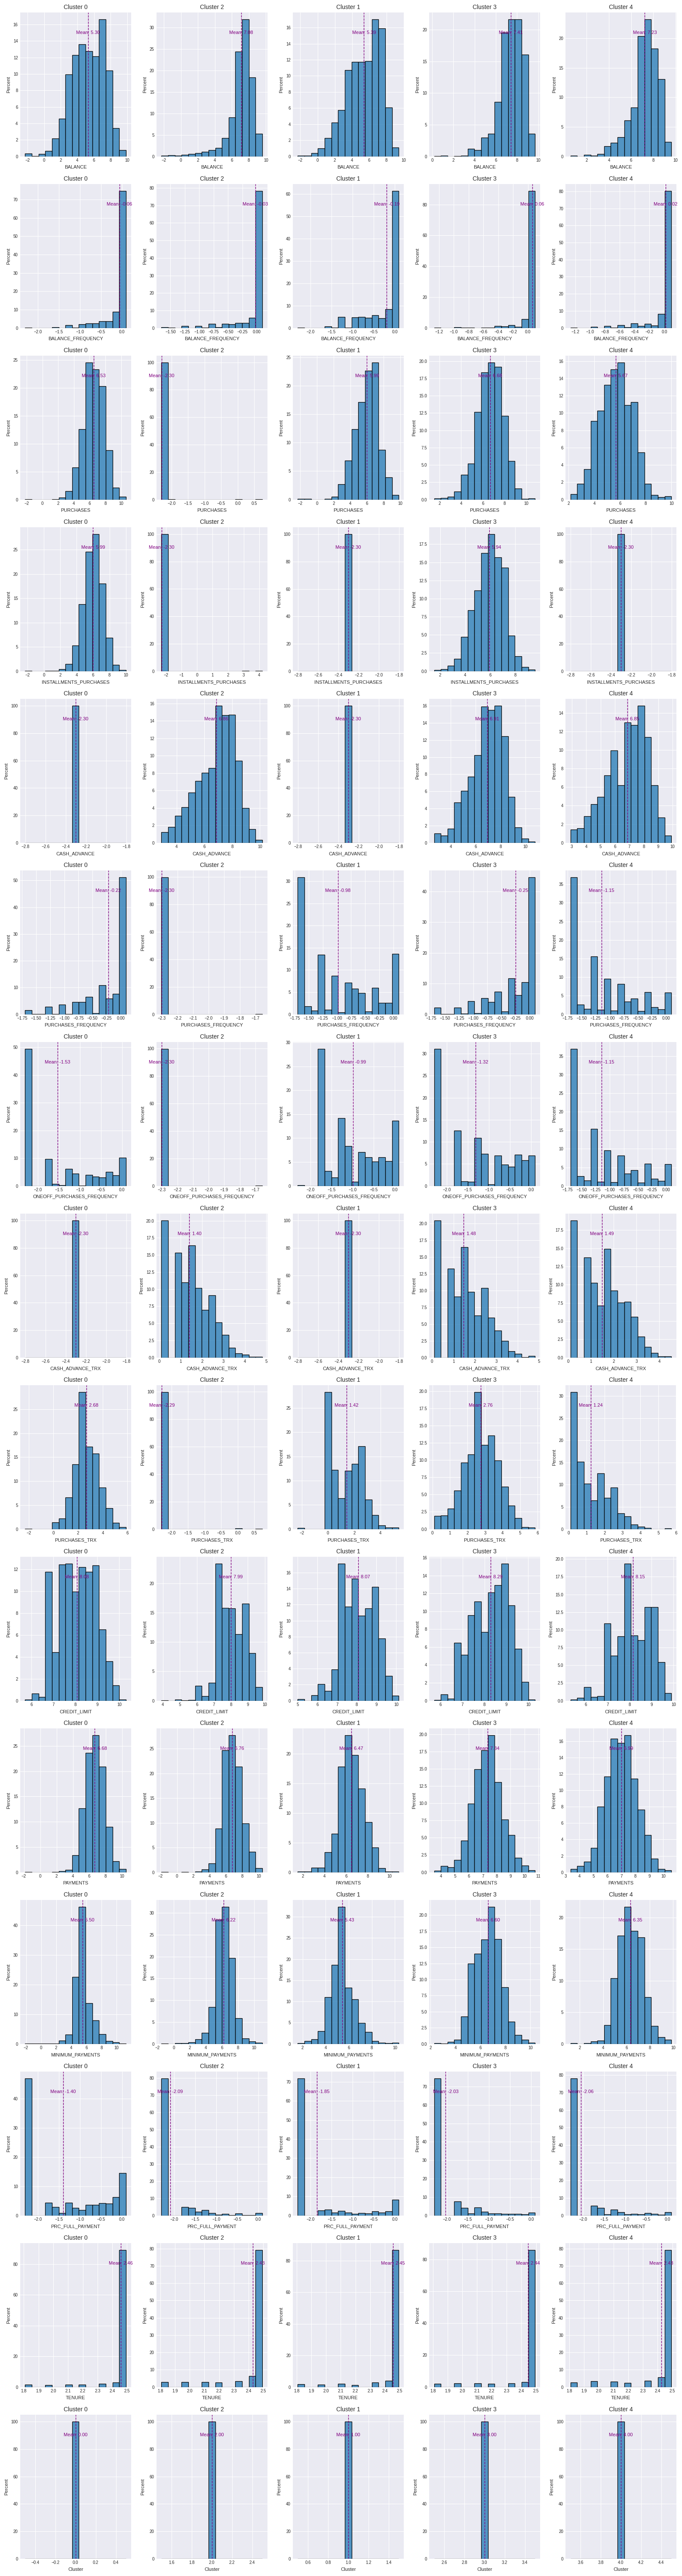

In [ ]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster']
clusters = df_copy_log['Cluster'].unique()

# Set up subplots dynamically based on the number of features (cols) and clusters
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Adjust subplot size dynamically if only 1 cluster or feature
if num_cols == 1:
    axes = np.expand_dims(axes, axis=1)
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)

# Loop through each feature and cluster
for i, col in enumerate(cols):
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        cluster_data = df_copy_log[df_copy_log['Cluster'] == cluster][col]

        # Plot histogram for the current cluster in the current subplot
        sns.histplot(cluster_data, bins=15, ax=axes[i, j], stat='percent', kde=False)

        # Set title and labels
        axes[i, j].set_title(f'Cluster {cluster}', fontsize=10)
        axes[i, j].set_xlabel(col, fontsize=8)
        axes[i, j].set_ylabel('Percent', fontsize=8)

        # Calculate and plot the mean
        mean_value = cluster_data.mean()
        axes[i, j].axvline(mean_value, color='purple', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1] * 0.85, f'Mean: {mean_value:.2f}',
                        color='purple', fontsize=8, horizontalalignment='center')

        # Improve readability of the ticks on the x-axis and y-axis
        axes[i, j].tick_params(axis='x', labelsize=7)
        axes[i, j].tick_params(axis='y', labelsize=7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


#Insights


### Cluster 0

Customer Behavior:
- Customers in Cluster 0 prefer to make purchases in installments rather than relying on cash advances.

Purchase Behavior:
- The average amount spent on installment purchases is $761.84, indicating that a significant portion of their spending is through installment payments.
- These customers tend to make frequent purchase transactions, averaging about 23 transactions.
- Approximately 76% of customers in this cluster exhibit frequent purchasing behavior, reflecting a consistent spending pattern.
- The average total purchase amount is $1,528, suggesting that while purchases are frequent, they are generally moderate in size.

---

### Cluster 1

Customer Behavior:
- Customers in Cluster 1 prefer one-off purchases over installment payments.

Purchase Behavior:
- Most purchases in this cluster are single transactions, indicating a tendency towards lump-sum spending.
- Customers in this cluster typically avoid installment payments, favoring immediate payments instead.
- The number of purchase transactions is lower compared to other clusters, with an average of 8 transactions.
- About 36% of customers here show frequent purchasing behavior, indicating moderate spending activity.
- The average total purchase amount is $903, reflecting a preference for single, moderate-sized purchases.

---

### Cluster 2

Customer Behavior:
- Customers in Cluster 2 show a strong preference for cash advances over installment purchases.

Purchase Behavior:
- The primary mode of spending for this cluster is cash advances, suggesting a reliance on immediate funds rather than installments.
- None of the customers in this cluster demonstrate frequent purchasing behavior, indicating a preference for infrequent or one-off spending.

Cash Advance:
- The average amount of cash advances is $2,011, suggesting that customers in Cluster 2 depend on larger cash advances to meet immediate financial needs, possibly due to unexpected expenses.

---

### Cluster 3

Customer Behavior:
- Customers in Cluster 3 exhibit a mix of installment purchases and cash advances.

Purchase Behavior:
- The average amount spent on installment purchases is $701.84, indicating a substantial portion of their spending through installments.
- These customers make frequent transactions, with an average of about 25.
- Approximately 74% of customers in this cluster show frequent purchasing behavior, demonstrating a consistent spending pattern.
- The average total purchase amount is $1,501, indicating that, despite frequent transactions, individual purchases are moderate in size.

Cash Advance:
- Customers in this cluster also utilize cash advances, with an average amount of $2,080.54, suggesting a reliance on immediate funds for their purchases.

---

### Cluster 4

Customer Behavior:
- Customers in Cluster 4 predominantly use cash advances instead of installment purchases.

Purchase Behavior:
- The average purchase amount for this cluster is $669, indicating a moderate level of spending.
- Customers here tend to make fewer transactions, averaging about 6.
- About 27% of customers in this cluster show frequent purchasing behavior, suggesting infrequent spending or one-time purchases.

Cash Advance:
- The average cash advance amount is $2,046.54, indicating a heavy reliance on cash advances. This could reflect financial instability or a need to cover unexpected expenses.

---
"""